In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy.stats as sci

In [3]:
csv_filename = '/home/roboticslab/Robotology/Repos/allostractor/data/2010Replication/3gradients/1.csv'
data = pd.read_csv(csv_filename)
print('Number of columns = ' + str(data.shape[1]))
print('Number of rows = ' + str(data.shape[0]))

Number of columns = 8
Number of rows = 70000


In [4]:
Xpose = data['Xposition'].to_list()
Ypose = data['Yposition'].to_list()

aV_arousal = data['aVarousal'].to_list()
dV_arousal = data['dVarousal'].to_list()

aV_security = data['aVsecurity'].to_list()
dV_security = data['dVsecurity'].to_list()

aV_food = data['aVfood'].to_list()
dV_food = data['dVfood'].to_list()

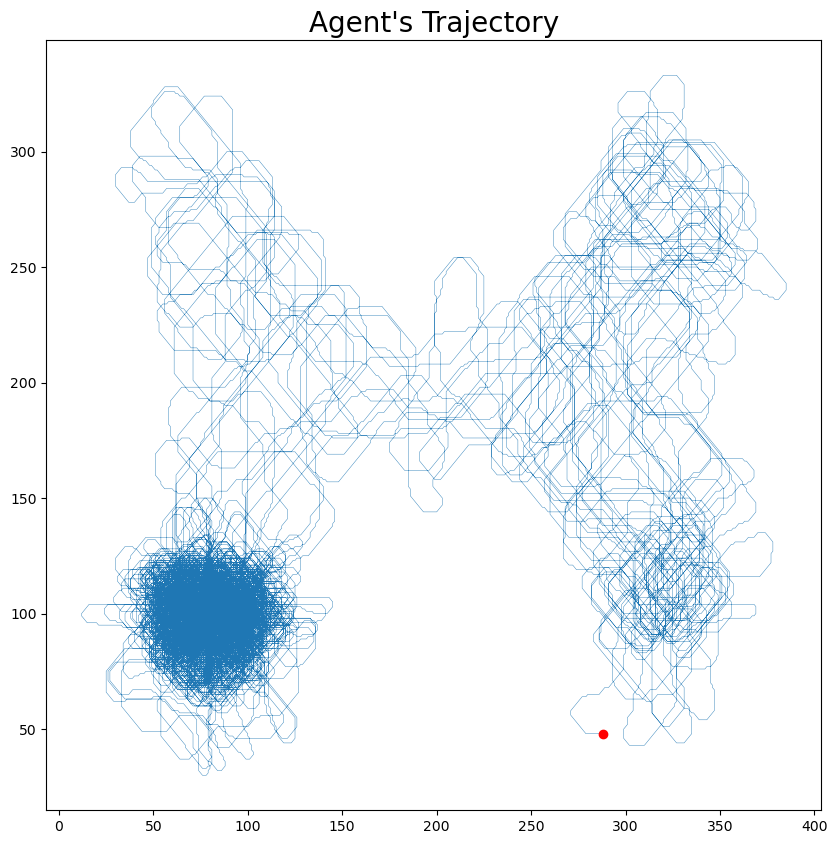

In [5]:
fig = plt.figure(figsize=(10, 10))
plt.plot(Xpose, Ypose, linewidth=0.3)
plt.yticks(np.arange(0, 410, step=50))
plt.xticks(np.arange(0, 410, step=50))
plt.title("Agent's Trajectory", fontsize=20)
plt.plot(Xpose[0],Ypose[0],'ro')
plt.show()
fig.savefig('/home/roboticslab/Robotology/Repos/allostractor/Plots/2010_3G/Trajectory.eps', format='eps')

[  0.     48.125  96.25  144.375 192.5   240.625 288.75  336.875 385.   ]


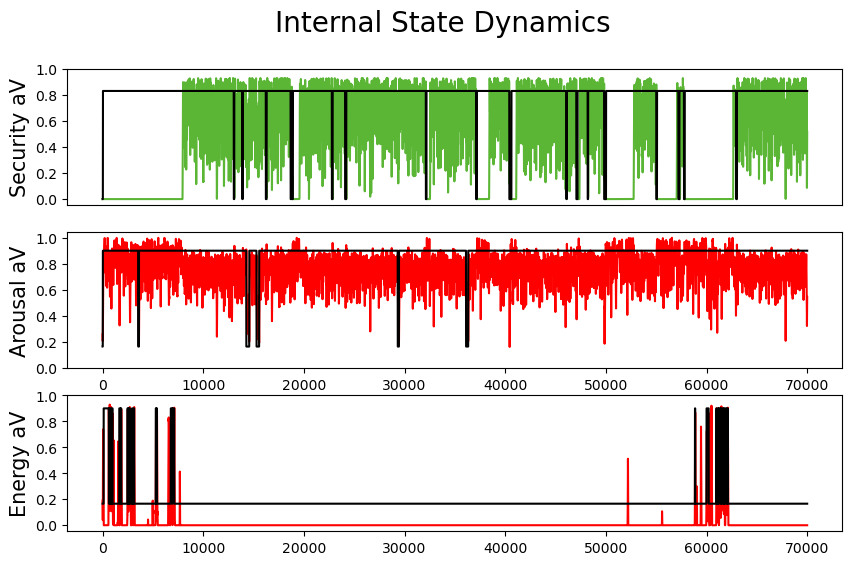

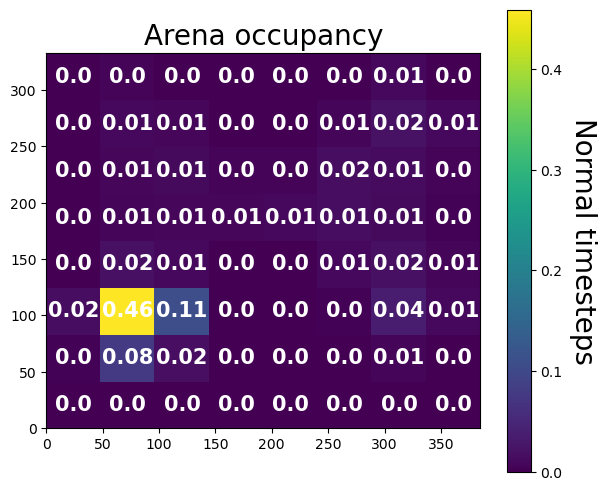

In [7]:
xy_array = np.column_stack((Xpose, Ypose))
x_array = xy_array[:,0]
y_array = xy_array[:,1]

bins = 8
xedges= []
yedges= []

for i in range(bins):
    xedges.append((max(Xpose)/bins)*i)
    yedges.append((max(Ypose)/bins)*i)
    
xedges.append((max(Xpose)))
yedges.append((max(Ypose)))


fig, ax = plt.subplots(figsize=(7, 6))
ax.set_aspect("equal")
hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges))
H = hist.T
H_normalized = H/float(xy_array.shape[0])

print(xbins)

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+xedges[1]/2, ybins[i]+yedges[1]/2, round(H_normalized[i,j],2), fontsize=15, ha="center", va="center", color="w", fontweight="bold")
        
        
ax.set_title('Arena occupancy', fontsize=20)
#ax.set_yticks(np.arange(0, 400, step=25))
#ax.set_xticks(np.arange(0, 400, step=25))
hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
cbar = fig.colorbar(hist)
cbar.set_label('Normal timesteps', rotation=270, fontsize=20, labelpad=+25)

plt.show()

12000.0


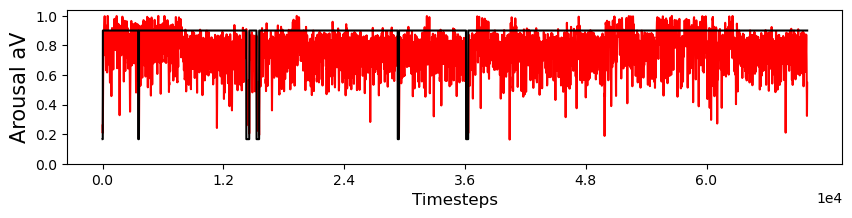

In [8]:
arousal_steps = round(len(aV_arousal)/6,-3)
print(arousal_steps)

plt.figure(figsize=(10, 2))
plt.plot(aV_arousal,'r')
plt.plot(dV_arousal,'black')
plt.xticks(np.arange(0, len(aV_arousal), step=arousal_steps))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yticks(np.arange(0, 1.1, step=0.2))
#plt.title('Arousal', fontsize=20)
plt.ylabel('Arousal aV', fontsize=15)
plt.xlabel('Timesteps', fontsize=12)
plt.show()

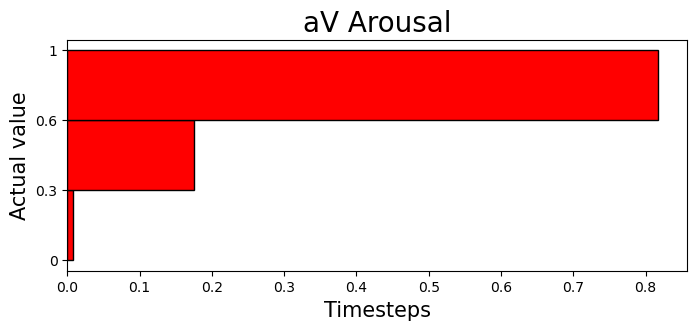

In [9]:
plt.figure(figsize=(8, 3))

normal = np.ones_like(aV_arousal)/float(len(aV_arousal))
plt.hist(aV_arousal, weights=normal, bins=[0,0.3333,0.666,1], color = "red",edgecolor='black', orientation='horizontal')
plt.yticks([0, 0.333, 0.666, 1], [0, 0.3, 0.6, 1])
plt.title('aV Arousal', fontsize=20)
plt.xlabel('Timesteps', fontsize=15)
plt.ylabel('Actual value', fontsize=15)
plt.show()

In [10]:
security_steps = round(len(aV_security)/6,-3)
print(security_steps)

plt.figure(figsize=(10, 2))
plt.plot(aV_security, "#5BB636")
plt.plot(dV_security,'black')
plt.xticks(np.arange(0, len(aV_security), step=security_steps))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yticks(np.arange(0, 1.1, step=0.2))
#plt.title('aV Security', fontsize=20)
plt.ylabel('Security aV', fontsize=15)
plt.xlabel('Timesteps', fontsize=12)
plt.show()

12000.0


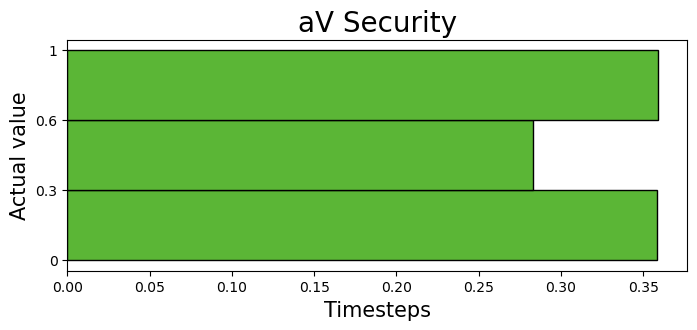

In [11]:
plt.figure(figsize=(8, 3))

normal = np.ones_like(aV_security)/float(len(aV_security))
plt.hist(aV_security, weights=normal, bins=[0,0.3333,0.666,1], color = "#5BB636",edgecolor='black', orientation='horizontal')
plt.yticks([0, 0.333, 0.666, 1], [0, 0.3, 0.6, 1])
plt.title('aV Security', fontsize=20)
plt.xlabel('Timesteps', fontsize=15)
plt.ylabel('Actual value', fontsize=15)
plt.show()

In [12]:
food_steps = round(len(aV_food)/6,-3)
print(food_steps)

plt.figure(figsize=(10, 2))
plt.plot(aV_food, "b")
plt.plot(dV_food,'black')
plt.xticks(np.arange(0, len(aV_food), step=food_steps))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yticks(np.arange(0, 1.1, step=0.2))
#plt.title('aV Security', fontsize=20)
plt.ylabel('Food aV', fontsize=15)
plt.xlabel('Timesteps', fontsize=12)
plt.show()

12000.0


In [13]:
plt.figure(figsize=(8, 3))

normal = np.ones_like(aV_food)/float(len(aV_food))
plt.hist(aV_food, weights=normal, bins=[0,0.3333,0.666,1], color = "blue",edgecolor='black', orientation='horizontal')
plt.yticks([0, 0.333, 0.666, 1], [0, 0.3, 0.6, 1])
plt.title('aV Food', fontsize=20)
plt.xlabel('Timesteps', fontsize=15)
plt.ylabel('Actual value', fontsize=15)
plt.show()

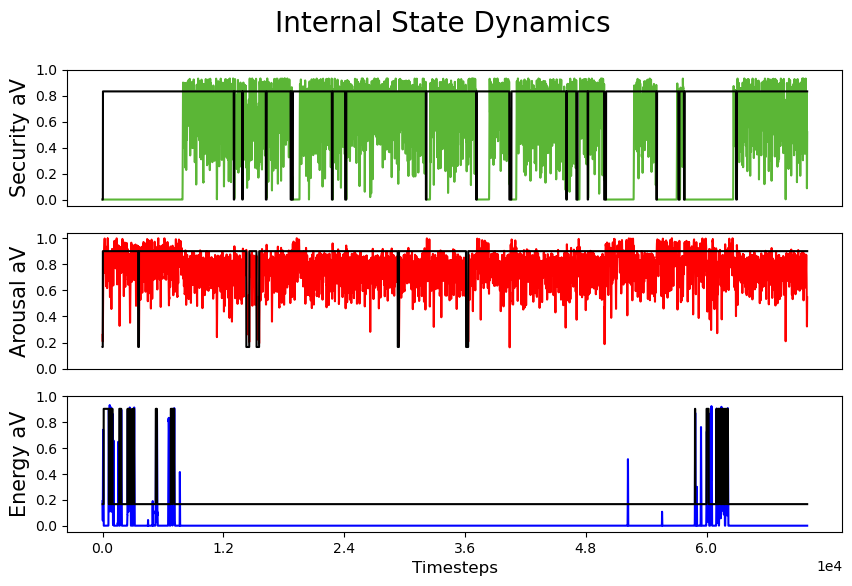

In [16]:
timesteps = list(range(0, len(aV_security)))

fig, axs = plt.subplots(3,figsize=(10,6))
fig.suptitle('Internal State Dynamics', fontsize=20)
axs[0].tick_params(bottom=False,labelbottom=False)
axs[0].plot(aV_security, "#5BB636")
axs[0].plot(dV_security,'black')
axs[0].set_yticks(np.arange(0, 1.1, step=0.2))
axs[0].set_ylabel('Security aV', fontsize=15)

axs[1].tick_params(bottom=False,labelbottom=False)
axs[1].plot(aV_arousal, "red")
axs[1].plot(dV_arousal,'black')
axs[1].set_yticks(np.arange(0, 1.1, step=0.2))
axs[1].set_ylabel('Arousal aV', fontsize=15)

axs[2].plot(aV_food, "blue")
axs[2].plot(dV_food,'black')
axs[2].set_yticks(np.arange(0, 1.1, step=0.2))
axs[2].set_ylabel('Energy aV', fontsize=15)
axs[2].set_xticks(np.arange(0, len(aV_security), step=security_steps))
axs[2].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[2].set_xlabel('Timesteps', fontsize=12)

plt.show()
fig.savefig('/home/roboticslab/Robotology/Repos/allostractor/Plots/2010_3G/aVTimeseries.eps', format='eps')

# Group analysis

In [17]:
d = {}
num_simulations=50
for i in range(num_simulations):
    csv_filename = '/home/roboticslab/Robotology/Repos/allostractor/data/2010Replication/3gradients/' + str(i+1) + '.csv'
    d["data{0}".format(i)] = pd.read_csv(csv_filename)

In [22]:
fig = plt.figure(figsize=(20, 20))
plots = []
counter = 20
for i in range(5):
    for j in range(4):
        dict_name = 'data'+ str(counter)
        counter += 1
        ax = plt.subplot2grid((5,4), (i,j))
        ax.plot(d[dict_name]['Xposition'].to_list(), d[dict_name]['Yposition'].to_list(), linewidth=0.3)
        ax.plot(d[dict_name]['Xposition'].to_list()[0],d[dict_name]['Yposition'].to_list()[0],'ro')
        plt.yticks(np.arange(0, 410, step=100))
        plt.xticks(np.arange(0, 410, step=100))
        
fig.suptitle('Random Example Trajectories', fontsize=30, y=0.92)
plt.show()
fig.savefig('/home/roboticslab/Robotology/Repos/allostractor/Plots/2010_3G/SM25Trajectories.eps', format='eps')

In [23]:
total_Xpose_list = []
counter = 0
for i in range(num_simulations):
    dict_name = 'data'+ str(counter)
    counter += 1
    for j in range(len(d['data0']['Xposition'])):
        total_Xpose_list.append(d[dict_name]['Xposition'][j])

In [24]:
total_Ypose_list = []
counter = 0
for i in range(num_simulations):
    dict_name = 'data'+ str(counter)
    counter += 1
    for j in range(len(d['data0']['Yposition'])):
        total_Ypose_list.append(d[dict_name]['Yposition'][j])

[  0.    15.76  31.52  47.28  63.04  78.8   94.56 110.32 126.08 141.84
 157.6  173.36 189.12 204.88 220.64 236.4  252.16 267.92 283.68 299.44
 315.2  330.96 346.72 362.48 378.24 394.  ]


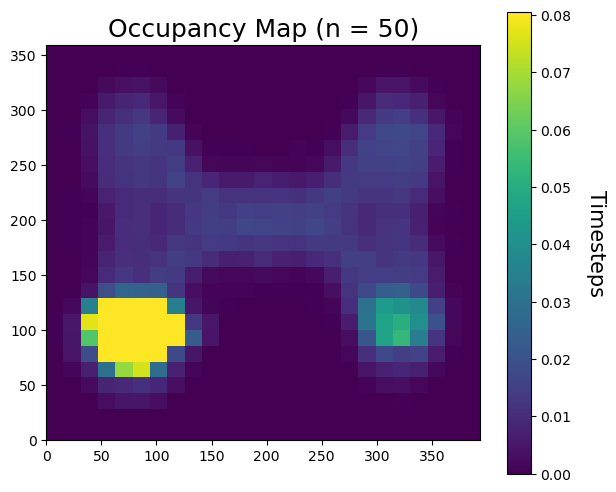

In [37]:
xy_array = np.column_stack((total_Xpose_list, total_Ypose_list))
x_array = xy_array[:,0]
y_array = xy_array[:,1]

bins = 25
xedges= []
yedges= []

for i in range(bins):
    xedges.append((max(total_Xpose_list)/bins)*i)
    yedges.append((max(total_Ypose_list)/bins)*i)
    
xedges.append((max(total_Xpose_list)))
yedges.append((max(total_Ypose_list)))


fig, ax = plt.subplots(figsize=(7, 6))
ax.set_aspect("equal")
hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges), vmax=25000)
H = hist.T
H_normalized = H/float(xy_array.shape[0])

print(xbins)

'''for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+xedges[1]/2, ybins[i]+yedges[1]/2, round(H_normalized[i,j],2), fontsize=13, ha="center", va="center", color="w", fontweight="bold")
  '''      
        
ax.set_title('Occupancy Map (n = 50)', fontsize=18)
#ax.set_yticks(np.arange(0, 400, step=25))
#ax.set_xticks(np.arange(0, 400, step=25))
hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
cbar = fig.colorbar(hist)
cbar.set_label('Timesteps', rotation=270, fontsize=15, labelpad=+25)

plt.show()
fig.savefig('/home/roboticslab/Robotology/Repos/allostractor/Plots/2010_3G/OccupancyMap.eps', format='eps')

In [26]:
total_aVarousal_list = []
counter = 0
for i in range(num_simulations):
    dict_name = 'data'+ str(counter)
    counter += 1
    for j in range(len(d['data0']['aVarousal'])):
        total_aVarousal_list.append(d[dict_name]['aVarousal'][j])

In [27]:
total_aVsecurity_list = []
counter = 0
for i in range(num_simulations):
    dict_name = 'data'+ str(counter)
    counter += 1
    for j in range(len(d['data0']['aVsecurity'])):
        total_aVsecurity_list.append(d[dict_name]['aVsecurity'][j])

In [28]:
total_aVfood_list = []
counter = 0
for i in range(num_simulations):
    dict_name = 'data'+ str(counter)
    counter += 1
    for j in range(len(d['data0']['aVfood'])):
        total_aVfood_list.append(d[dict_name]['aVfood'][j])

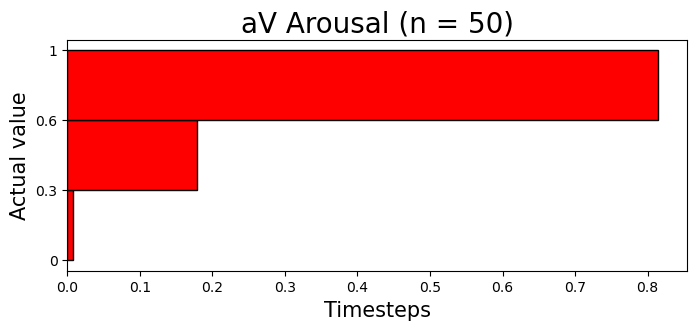

In [29]:
plt.figure(figsize=(8, 3))

normal = np.ones_like(total_aVarousal_list)/float(len(total_aVarousal_list))
plt.hist(total_aVarousal_list, weights=normal, bins=[0,0.3333,0.666,1], color = "red",edgecolor='black', orientation='horizontal')
plt.yticks([0, 0.333, 0.666, 1], [0, 0.3, 0.6, 1])
plt.title('aV Arousal (n = 50)', fontsize=20)
plt.xlabel('Timesteps', fontsize=15)
plt.ylabel('Actual value', fontsize=15)
plt.show()

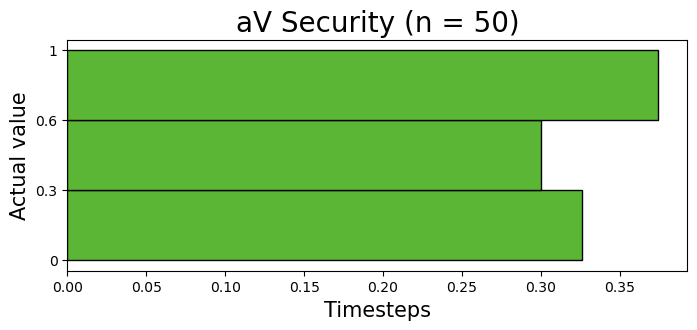

In [30]:
plt.figure(figsize=(8, 3))

normal = np.ones_like(total_aVsecurity_list)/float(len(total_aVsecurity_list))
plt.hist(total_aVsecurity_list, weights=normal, bins=[0,0.3333,0.666,1], color = "#5BB636",edgecolor='black', orientation='horizontal')
plt.yticks([0, 0.333, 0.666, 1], [0, 0.3, 0.6, 1])
plt.title('aV Security (n = 50)', fontsize=20)
plt.xlabel('Timesteps', fontsize=15)
plt.ylabel('Actual value', fontsize=15)
plt.show()

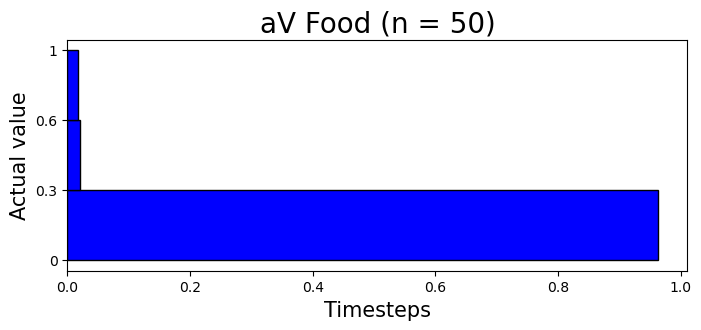

In [31]:
plt.figure(figsize=(8, 3))

normal = np.ones_like(total_aVfood_list)/float(len(total_aVfood_list))
plt.hist(total_aVfood_list, weights=normal, bins=[0,0.3333,0.666,1], color = "blue",edgecolor='black', orientation='horizontal')
plt.yticks([0, 0.333, 0.666, 1], [0, 0.3, 0.6, 1])
plt.title('aV Food (n = 50)', fontsize=20)
plt.xlabel('Timesteps', fontsize=15)
plt.ylabel('Actual value', fontsize=15)
plt.show()

In [35]:
normal = np.ones_like(total_aVsecurity_list)/float(len(total_aVsecurity_list))

fig, axs = plt.subplots(3,figsize=(6,9))
fig.suptitle('Actual Values (n = 50)', fontsize=20, y=0.95)
axs[0].hist(total_aVsecurity_list, weights=normal, bins=[0,0.3333,0.666,1], color = "#5BB636",edgecolor='black', orientation='horizontal')
axs[0].set_yticks([0, 0.333, 0.666, 1])
axs[0].set_yticklabels([0, 0.3, 0.6, 1])
axs[0].set_ylabel('Security', fontsize=15)


axs[1].hist(total_aVarousal_list, weights=normal, bins=[0,0.3333,0.666,1], color = "red",edgecolor='black', orientation='horizontal')
axs[1].set_yticks([0, 0.333, 0.666, 1])
axs[1].set_yticklabels([0, 0.3, 0.6, 1])
axs[1].set_ylabel('Arousal', fontsize=15)

axs[2].hist(total_aVfood_list, weights=normal, bins=[0,0.3333,0.666,1], color = "blue",edgecolor='black', orientation='horizontal')
axs[2].set_yticks([0, 0.333, 0.666, 1])
axs[2].set_yticklabels([0, 0.3, 0.6, 1])
axs[2].set_ylabel('Energy', fontsize=15)
axs[2].set_xlabel('Timesteps', fontsize=15)

plt.show()
fig.savefig('/home/roboticslab/Robotology/Repos/allostractor/Plots/2010_3G/aVHistogram.eps', format='eps')